In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import pandas as pd

In [2]:
sframe_file = "/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/sframe-b0-00104282.fits"

h = fitsio.FITS(sframe_file)
#h = fits.open(sframe_file)
sel = h["FIBERMAP"]["OBJTYPE"].read() == "SKY"
sky = h["FLUX"].read()[sel,:]


In [3]:
np.shape(sky)

(40, 2751)

In [4]:
set(h["FIBERMAP"]["OBJTYPE"].read())

{'', 'SKY', 'TGT'}

In [5]:
fiberflat_file = "/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20211025/fiberflatnight-z0-20211025.fits"
h = fitsio.FITS(fiberflat_file)
fflat = h["FIBERFLAT"].read() 


#h = fits.open(sframe_file)

In [6]:
np.shape(fflat)

(500, 2881)

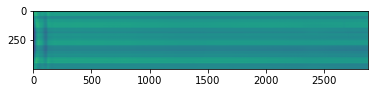

In [15]:
plt.imshow(fflat)

In [28]:
fiberflats = glob.glob("/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/2021*/fiberflatnight-z0-*.fits")

In [29]:
fiberflats.sort()

In [30]:
fiberflats

['/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210105/fiberflatnight-z0-20210105.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210106/fiberflatnight-z0-20210106.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210108/fiberflatnight-z0-20210108.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210109/fiberflatnight-z0-20210109.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210110/fiberflatnight-z0-20210110.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210111/fiberflatnight-z0-20210111.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210112/fiberflatnight-z0-20210112.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210115/fiberflatnight-z0-20210115.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210116/fiberflatnight-z0-20210116.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210131/fiberflatnight-z0-20210131.fits',
 '/global/

In [33]:
len(fiberflats)*10*3*20/3600.0

29.166666666666668

In [95]:
import pandas as pd

25 [20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007, 20211008, 20211010, 20211011, 20211012, 20211013, 20211014, 20211015, 20211016, 20211017, 20211018, 20211019, 20211020, 20211021, 20211022, 20211023, 20211024, 20211025, 20211026]


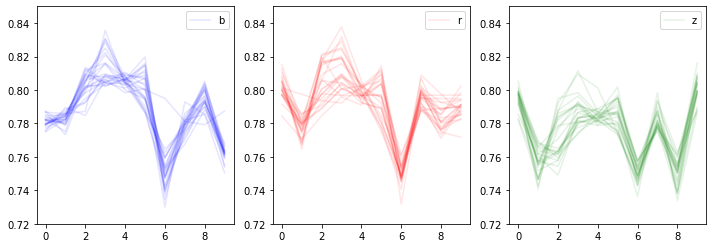

In [40]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('calibnight_entropy.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
plt.figure(figsize=(12,4))
for ic, camera in enumerate(['b', 'r', 'z']):
    
    plt.subplot(1,3,ic+1)
    for date in dates:
        ii=(data['CAMERA']==camera) & (data['NIGHT']==date)
        if date!=dates[0]:
            plt.plot(data['PETAL'][ii], data['ENTROPY'][ii], color=colors[camera], alpha=0.1)
        else:
            plt.plot(data['PETAL'][ii], data['ENTROPY'][ii], label=camera, color=colors[camera], alpha=0.1)
    plt.legend()
    plt.ylim([0.72, 0.85])

26 [20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007, 20211008, 20211010, 20211011, 20211012, 20211013, 20211014, 20211015, 20211016, 20211017, 20211018, 20211019, 20211020, 20211021, 20211022, 20211023, 20211024, 20211025, 20211026, 20211027]


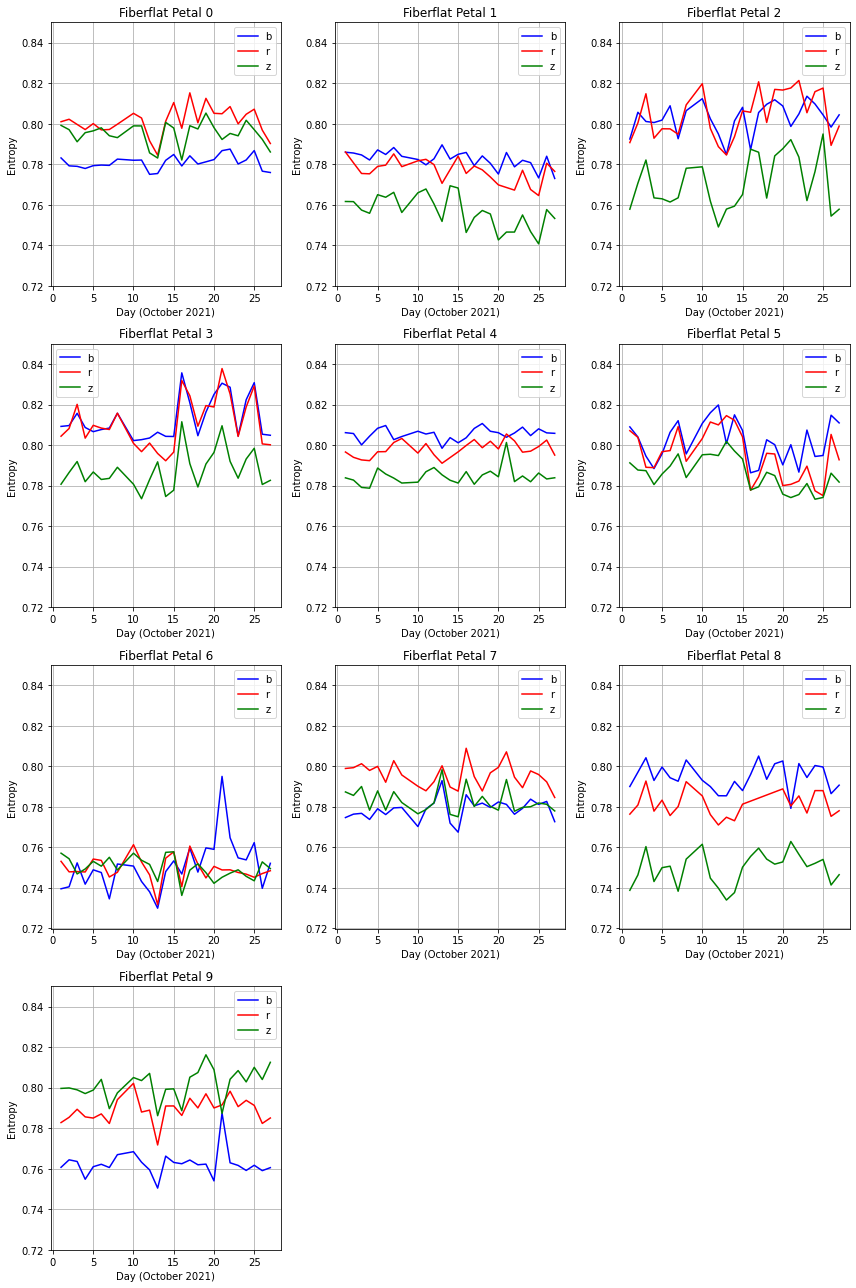

In [59]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('calibnight_entropy.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
plt.figure(figsize=(12,18))
for ic, petal in enumerate(range(10)):
    plt.subplot(4,3,ic+1)
    plt.title("Fiberflat Petal {}".format(petal))
    for camera in ['b', 'r', 'z']:
        ii=(data['PETAL']==petal) & (data['CAMERA']==camera)
        plt.plot(data['NIGHT'][ii]-20211000, data['ENTROPY'][ii], label=camera, color=colors[camera])
    plt.legend()
    plt.ylim([0.72, 0.85])
    plt.xlabel("Day (October 2021)")
    plt.ylabel("Entropy")
    plt.grid()
    plt.tight_layout()


1 [20211001]


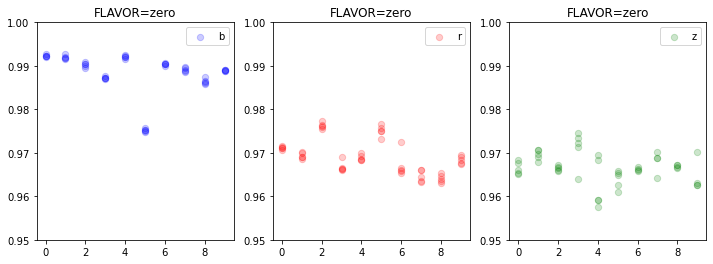

In [3]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('entropy_exposures_202110.csv')
dates = list(set(data['NIGHT']))
dates.sort()
print(len(dates), dates)
plt.figure(figsize=(12,4))
for ic, camera in enumerate(['b', 'r', 'z']):
    
    plt.subplot(1,3,ic+1)
    for date in dates:
        ii=(data['CAMERA']==camera) & (data['NIGHT']==date) & (data['FLAVOR']=='zero')
        if date!=dates[0]:
            plt.scatter(data['PETAL'][ii], data['ENTROPY'][ii], color=colors[camera], alpha=0.2, s=40)
        else:
            plt.scatter(data['PETAL'][ii], data['ENTROPY'][ii], label=camera, color=colors[camera], alpha=0.2, s=40)
        plt.title('FLAVOR=zero')
    plt.legend()
    plt.ylim([0.9500, 1.0])


1 [20211001]


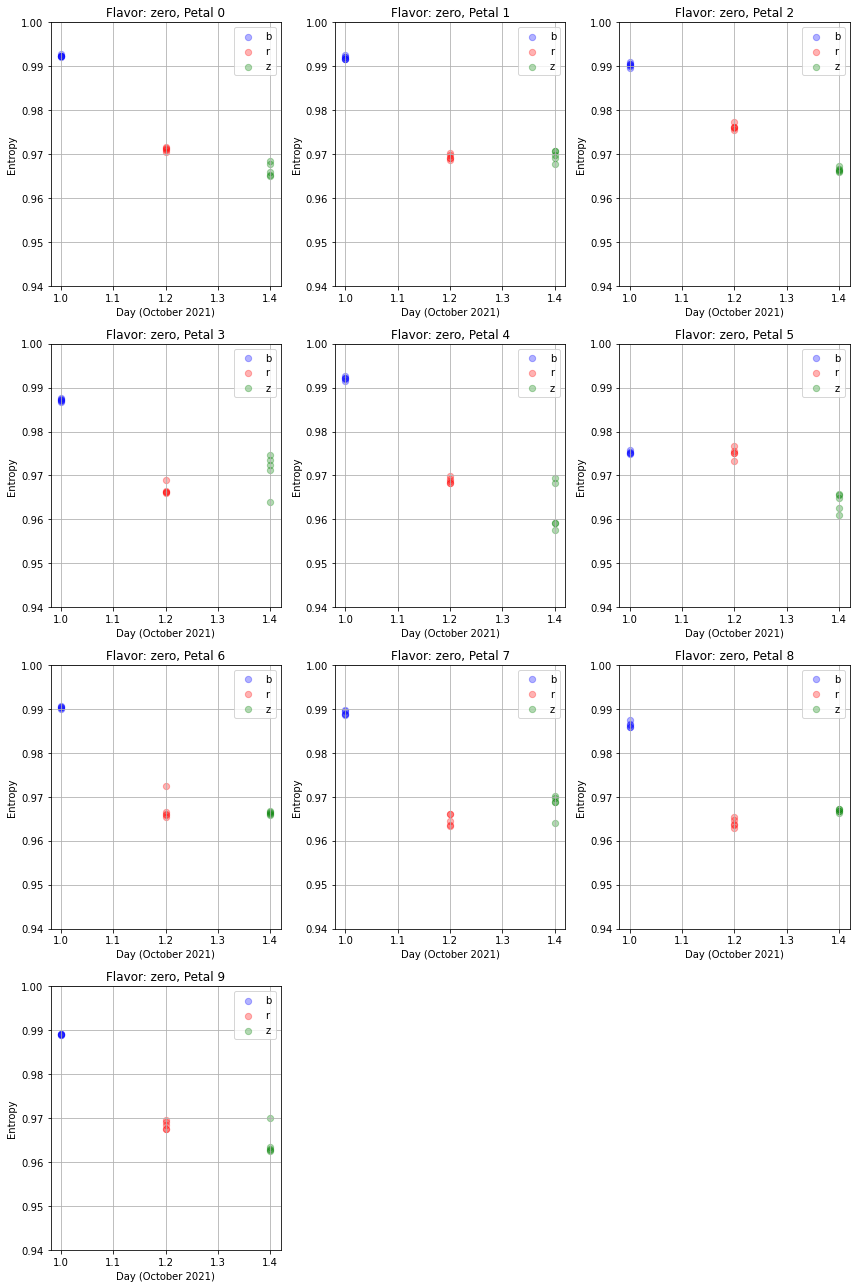

In [4]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('entropy_exposures_202110.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
dates.sort()
flavor = 'zero'
plt.figure(figsize=(12,18))
for ic, petal in enumerate(range(10)):
    plt.subplot(4,3,ic+1)
    plt.title("Flavor: {}, Petal {}".format(flavor, petal))
    for dd, camera in enumerate(['b', 'r', 'z']):
        ii=(data['PETAL']==petal) & (data['CAMERA']==camera) & (data['FLAVOR']==flavor)
        plt.scatter(data['NIGHT'][ii]-20211000 + dd*0.2, data['ENTROPY'][ii], label=camera, color=colors[camera], s=40, alpha=0.3)
        #print(set(data['NIGHT'][ii]-20211000))
    plt.legend()
    if flavor=='science':
        plt.ylim([0.80, 1.0])
    else:
        plt.ylim([0.94, 1.0])
    plt.xlabel("Day (October 2021)")
    plt.ylabel("Entropy")
    plt.grid()
    plt.tight_layout()


In [182]:
header = fitsio.read("/global/cfs/cdirs/desi/spectro/data/20211026/00106129/desi-00106129.fits.fz", header=True)

In [183]:
header[1]["FLAVOR"]

'zero'